In [5]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Step 1: Data Collection
import pandas as pd
import numpy as np


In [9]:
import yfinance as yf
from datetime import datetime

In [10]:
# Define the ticker symbol
ticker_symbol = "AAPL"

In [11]:
# Download historical data
data = yf.download(ticker_symbol, start="2023-01-01", end="2023-04-01")

[*********************100%%**********************]  1 of 1 completed


In [12]:
# Step 2: Data Preprocessing
# We'll use the adjusted closing price as our target variable
data = data[['Adj Close']]
data.dropna(inplace=True)


C:\Users\pandi\AppData\Local\Temp\ipykernel_15464\1153571729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [25]:
# Step 3: Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

In [14]:
# Define features (X) and target variable (y)
X = np.arange(1, len(data) + 1).reshape(-1, 1)
# Define features (X) - Use actual dates instead of order
# X = data.index.to_numpy().reshape(-1, 1)
y = data.values

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
# Step 4: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)



In [26]:
# Evaluate the model
# train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
# test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [27]:
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2:.2f}")



RMSE: 4.400777703637102
R^2 Score: 0.85


In [20]:
# Step 5: Prediction
# Predict the stock price for the next day
next_day = np.array([[len(data) + 1]])
predicted_price = model.predict(next_day)
print(f"Predicted price for the next day: {predicted_price[0][0]:.2f}")


Predicted price for the next day: 161.77


In [21]:
import matplotlib.pyplot as plt

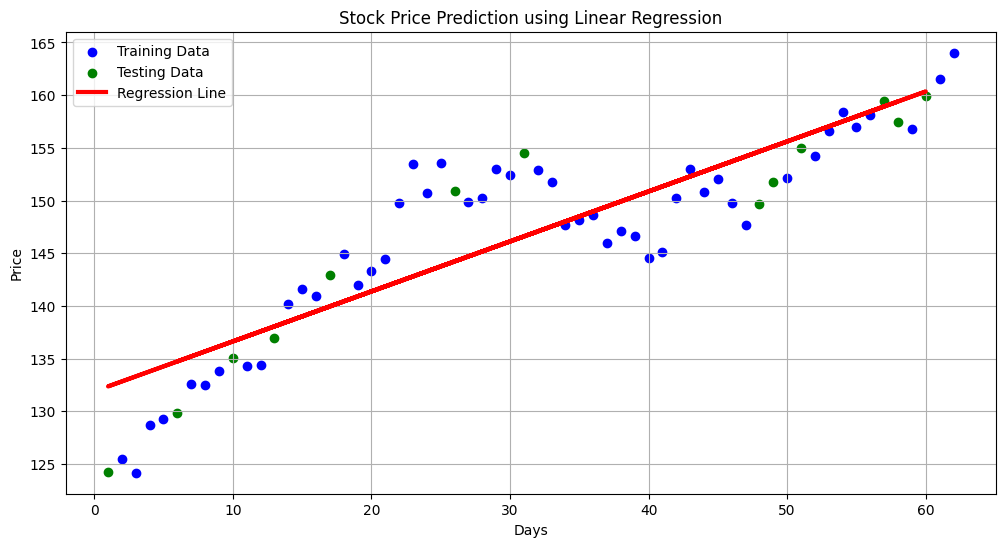

In [22]:
# Plot the training data
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
# plt.plot(X_train, y_train, color='blue', label='Training Data')

# Plot the testing data
plt.scatter(X_test, y_test, color='green', label='Testing Data')
# plt.plot(X_test, y_test, color='green', label='Testing Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')

plt.title('Stock Price Prediction using Linear Regression')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
ds = 